In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
import pickle

In [18]:
import pandas as pd
df = pd.read_csv('DATA7_SIEBERT_PREPOCESSED.csv')
df

,user_id,username,rating,original_text,gmap_id,business_name,translated_text,wcount,sentiment_label,sentiment_score,...,pos_tags,lemmatized,no_stopwords,lemma_fix,stop_fix,final_with_stopword,final_no_stopword,ori_wc,final_wc,final_no_stopword_wc
0,1.021213e+20,Shana Smith,5.0,Will have to come again soon..due for another cut,0x8805428f9ca29317:0x4122efd1046de654,Supercuts,Will have to come again soon..due for another cut,9,NEGATIVE,0.999488,...,"[[('will', 'MD'), ('have', 'VB'), ('to', 'TO')...","[['will', 'have', 'to', 'come', 'again', 'soon...","[['come', 'soon', '..', 'due', 'another', 'cut']]","[['will', 'have', 'to', 'come', 'again', 'soon...","[['come', 'soon', 'due', 'another', 'cut']]",will have to come again soon due for another cut,come soon due another cut,9,10,5
1,1.016310e+20,Brittiny Beil,5.0,I started my run with treatment at meadow Cree...,0x52b247197357f7f7:0x66d0d92cf109a1d5,Meadow Creek,I started my run with treatment at meadow Cree...,91,POSITIVE,0.998918,...,"[[('i', 'NN'), ('started', 'VBD'), ('my', 'PRP...","[['i', 'start', 'my', 'run', 'with', 'treatmen...","[['start', 'run', 'treatment', 'meadow', 'cree...","[['i', 'start', 'my', 'run', 'with', 'treatmen...","[['start', 'run', 'treatment', 'meadow', 'cree...",i start my run with treatment at meadow creek ...,start run treatment meadow creek 2012 end run ...,91,95,51
2,1.056987e+20,Michael Reagan,5.0,I like the professional but also friendly staf...,0x8858272f5a118b01:0xaa680edfef593625,AFC Urgent Care - Bon Secours - Simpsonville,I like the professional but also friendly staf...,46,POSITIVE,0.998923,...,"[[('i', 'NN'), ('like', 'IN'), ('the', 'DT'), ...","[['i', 'like', 'the', 'professional', 'but', '...","[['like', 'professional', 'also', 'friendly', ...","[['i', 'like', 'the', 'professional', 'but', '...","[['like', 'professional', 'also', 'friendly', ...",i like the professional but also friendly staf...,like professional also friendly staff location...,46,46,23
3,1.054290e+20,Maureen Linker,5.0,I can't give enough praise for Dr K and her wo...,0x54950e4f37f2f0e1:0x2dd2b51972a685db,Prestige Family Dentistry,I can't give enough praise for Dr K and her wo...,94,POSITIVE,0.998932,...,"[[('i', 'NN'), ('can', 'MD'), ('not', 'RB'), (...","[['i', 'can', 'not', 'give', 'enough', 'praise...","[['not', 'give', 'enough', 'praise', 'dr', 'k'...","[['i', 'can', 'not', 'give', 'enough', 'praise...","[['not', 'give', 'enough', 'praise', 'dr', 'k'...",i can not give enough praise for dr k and her ...,not give enough praise dr k wonderful staff sh...,94,95,50
4,1.002408e+20,Adriana Bohorquez,5.0,Love the amenities. My son asks me everyday to...,0x89b7fecef6f95e49:0xac324c8a4514eab,The Y in Pasadena,Love the amenities. My son asks me everyday to...,13,POSITIVE,0.998877,...,"[[('love', 'VB'), ('the', 'DT'), ('amenities',...","[['love', 'the', 'amenity'], ['my', 'son', 'as...","[['love', 'amenity'], ['son', 'ask', 'everyday...","[['love', 'the', 'amenity'], ['my', 'son', 'as...","[['love', 'amenity'], ['son', 'ask', 'everyday...",love the amenity my son ask me everyday to go ...,love amenity son ask everyday go gym,13,13,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224692,1.015856e+20,Th Cann,1.0,“I am happy to learn that it is your professio...,0x87f75f6d6de1af63:0xc5abbc8693804d76,"Mayo Clinic Hospital, Saint Marys Campus",“I am happy to learn that it is your professio...,239,NEGATIVE,0.999482,...,"[[('“', 'NN'), ('i', 'NN'), ('am', 'VBP'), ('h...","[['“', 'i', 'be', 'happy', 'to', 'learn', 'tha...","[['“', 'happy', 'learn', 'professional', 'opin...","[['i', 'be', 'happy', 'to', 'learn', 'that', '...","[['happy', 'learn', 'professional', 'opinion',...",i be happy to learn that it be your profession...,happy learn professional opinion surgeon opini...,239,242,104
1224693,1.130505e+20,Wendy Hughes,4.0,“I love the office and detail that is given ab...,0x88f8aa36904616c1:0x88440359bfcd5334,LensCrafters,“I love the office and

In [19]:
#ONLY GET HIGH CONFIDENCE REVIEW
high_df = df[df['sentiment_score'] >= 0.90].copy()
low_df = df[df['sentiment_score'] < 0.90].copy()

print(len(high_df))
print(len(low_df))

df = high_df

1222986
1711


**DROP USELESS COLUMN**

In [20]:
df = df.drop(columns = ['wcount','emoji_text','expanded_text','sentences','word_tokens','punctuation_removed','pos_tags','lemmatized','no_stopwords','lemma_fix','stop_fix'])
df

,user_id,username,rating,original_text,gmap_id,business_name,translated_text,sentiment_label,sentiment_score,final_with_stopword,final_no_stopword,ori_wc,final_wc,final_no_stopword_wc
0,1.021213e+20,Shana Smith,5.0,Will have to come again soon..due for another cut,0x8805428f9ca29317:0x4122efd1046de654,Supercuts,Will have to come again soon..due for another cut,NEGATIVE,0.999488,will have to come again soon due for another cut,come soon due another cut,9,10,5
1,1.016310e+20,Brittiny Beil,5.0,I started my run with treatment at meadow Cree...,0x52b247197357f7f7:0x66d0d92cf109a1d5,Meadow Creek,I started my run with treatment at meadow Cree...,POSITIVE,0.998918,i start my run with treatment at meadow creek ...,start run treatment meadow creek 2012 end run ...,91,95,51
2,1.056987e+20,Michael Reagan,5.0,I like the professional but also friendly staf...,0x8858272f5a118b01:0xaa680edfef593625,AFC Urgent Care - Bon Secours - Simpsonville,I like the professional but also friendly staf...,POSITIVE,0.998923,i like the professional but also friendly staf...,like professional also friendly staff location...,46,46,23
3,1.054290e+20,Maureen Linker,5.0,I can't give enough praise for Dr K and her wo...,0x54950e4f37f2f0e1:0x2dd2b51972a685db,Prestige Family Dentistry,I can't give enough praise for Dr K and her wo...,POSITIVE,0.998932,i can not give enough praise for dr k and her ...,not give enough praise dr k wonderful staff sh...,94,95,50
4,1.002408e+20,Adriana Bohorquez,5.0,Love the amenities. My son asks me everyday to...,0x89b7fecef6f95e49:0xac324c8a4514eab,The Y in Pasadena,Love the amenities. My son asks me everyday to...,POSITIVE,0.998877,love the amenity my son ask me everyday to go ...,love amenity son ask everyday go gym,13,13,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224692,1.015856e+20,Th Cann,1.0,“I am happy to learn that it is your professio...,0x87f75f6d6de1af63:0xc5abbc8693804d76,"Mayo Clinic Hospital, Saint Marys Campus",“I am happy to learn that it is your professio...,NEGATIVE,0.999482,i be happy to learn that it be your profession...,happy learn professional opinion surgeon opini...,239,242,104
1224693,1.130505e+20,Wendy Hughes,4.0,“I love the office and detail that is given ab...,0x88f8aa36904616c1:0x88440359bfcd5334,LensCrafters,“I love the office and detail that is given ab...,POSITIVE,0.998932,i love the office and detail that be give abou...,love office detail give eye exam use modern te...,17,17,9
1224694,1.130505e+20,Wendy Hughes,4.0,“I love the office and detail that is given ab...,0x88f8aa342cb2c9db:0x80d82d44eb4fccf4,Eye Associates of Columbia at the Village of S...,“I love the office and detail that is given ab...,POSITIVE,0.998932,i love the office and detail that be give abou...,love office detail give eye exam use modern te...,17,17,9
1224695,1.144222e+20,F H,1.0,‼️‼️Beware they keep changing the name of the ...,0x89b708e76e18472f:0xd726e5892f7518f0,UM Charles Regional Medical Center,‼️‼️Beware they keep changing the name of the ...,NEGATIVE,0.999492,double_exclamation_mark double_exclamation_mar...,double_exclamation_mark double_exclamation_mar...,107,112,56


**LABEL ENCODING**

In [21]:
df['sentiment_label'].value_counts()

#mapping
label_mapping = {'NEGATIVE': 0, 'POSITIVE': 1}
df['label'] = df['sentiment_label'].map(label_mapping)
df

,user_id,username,rating,original_text,gmap_id,business_name,translated_text,sentiment_label,sentiment_score,final_with_stopword,final_no_stopword,ori_wc,final_wc,final_no_stopword_wc,label
0,1.021213e+20,Shana Smith,5.0,Will have to come again soon..due for another cut,0x8805428f9ca29317:0x4122efd1046de654,Supercuts,Will have to come again soon..due for another cut,NEGATIVE,0.999488,will have to come again soon due for another cut,come soon due another cut,9,10,5,0
1,1.016310e+20,Brittiny Beil,5.0,I started my run with treatment at meadow Cree...,0x52b247197357f7f7:0x66d0d92cf109a1d5,Meadow Creek,I started my run with treatment at meadow Cree...,POSITIVE,0.998918,i start my run with treatment at meadow creek ...,start run treatment meadow creek 2012 end run ...,91,95,51,1
2,1.056987e+20,Michael Reagan,5.0,I like the professional but also friendly staf...,0x8858272f5a118b01:0xaa680edfef593625,AFC Urgent Care - Bon Secours - Simpsonville,I like the professional but also friendly staf...,POSITIVE,0.998923,i like the professional but also friendly staf...,like professional also friendly staff location...,46,46,23,1
3,1.054290e+20,Maureen Linker,5.0,I can't give enough praise for Dr K and her wo...,0x54950e4f37f2f0e1:0x2dd2b51972a685db,Prestige Family Dentistry,I can't give enough praise for Dr K and her wo...,POSITIVE,0.998932,i can not give enough praise for dr k and her ...,not give enough praise dr k wonderful staff sh...,94,95,50,1
4,1.002408e+20,Adriana Bohorquez,5.0,Love the amenities. My son asks me everyday to...,0x89b7fecef6f95e49:0xac324c8a4514eab,The Y in Pasadena,Love the amenities. My son asks me everyday to...,POSITIVE,0.998877,love the amenity my son ask me everyday to go ...,love amenity son ask everyday go gym,13,13,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224692,1.015856e+20,Th Cann,1.0,“I am happy to learn that it is your professio...,0x87f75f6d6de1af63:0xc5abbc8693804d76,"Mayo Clinic Hospital, Saint Marys Campus",“I am happy to learn that it is your professio...,NEGATIVE,0.999482,i be happy to learn that it be your profession...,happy learn professional opinion surgeon opini...,239,242,104,0
1224693,1.130505e+20,Wendy Hughes,4.0,“I love the office and detail that is given ab...,0x88f8aa36904616c1:0x88440359bfcd5334,LensCrafters,“I love the office and detail that is given ab...,POSITIVE,0.998932,i love the office and detail that be give abou...,love office detail give eye exam use modern te...,17,17,9,1
1224694,1.130505e+20,Wendy Hughes,4.0,“I love the office and detail that is given ab...,0x88f8aa342cb2c9db:0x80d82d44eb4fccf4,Eye Associates of Columbia at the Village of S...,“I love the office and detail that is given ab...,POSITIVE,0.998932,i love the office and detail that be give abou...,love office detail give eye exam use modern te...,17,17,9,1
1224695,1.144222e+20,F H,1.0,‼️‼️Beware they keep changing the name of the ...,0x89b708e76e18472f:0xd726e5892f7518f0,UM Charles Regional Medical Center,‼️‼️Beware they keep changing the name of the ...,NEGATIVE,0.999492,double_exclamation_mark double_exclamation_mar...,double_exclamation_mark double_exclamation_mar...,107,112,56,0


In [22]:
df['label'].value_counts()

label
1    732054
0    490932
Name: count, dtype: int64

**SPLIT DATA INTO TRAIN TEST, THEN TRAIN VAL**

In [23]:
#RAW DATA
X = df['final_with_stopword'].astype(str)
y = df['label']

#SPLIT TRAIN TEST (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

#RESET INDEX TO AVOID MISALIGNMENT
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

#CONVERT TO DATAFRAME FOR UNDERSAMPLING
X_train_df = X_train.to_frame()

**RANDOM UNDERSAMPLING**

In [24]:
rus = RandomUnderSampler(sampling_strategy = 'majority', random_state = 42)
X_train_resampled_df, y_train_resampled = rus.fit_resample(X_train_df, y_train)

#SPLIT RESAMPLED DATA INTO TRAIN/VAL (80/20)
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_resampled_df, y_train_resampled, test_size = 0.2, stratify = y_train_resampled, random_state = 42
)

#CONVERT TO LIST
X_train_final = X_train_final['final_with_stopword'].tolist()
X_val = X_val['final_with_stopword'].tolist()
X_test = X_test.tolist()

In [25]:
print(y_train_resampled.value_counts())

label
0    392745
1    392745
Name: count, dtype: int64


**TOKENIZATION AND PADDING**

In [26]:
#TOKENIZER SETUP
vocab_size = 10000
max_len = 100
tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(X_train_final)

#SAVE TOKENIZER
with open("tokenizer_lstm.pkl","wb") as f:
    pickle.dump(tokenizer,f)

#CONVERT TO SEQUENCES
X_train_seq = tokenizer.texts_to_sequences(X_train_final)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

#PAD SEQUENCES
X_train_pad = pad_sequences(X_train_seq, maxlen = max_len, padding = 'post',truncating = 'post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

**GLOVE EMBEDDING**

In [27]:
import numpy as np
#SET EMBEDDING PARAMETERS
vocab_size = 10000 #must match tokenizer
embedding_dim = 100 #must match glove vector size
glove_path = "glove.6B.100d.txt" #file must exist in the same folder

#LOAD GLOVE EMBEDDING INTO DICTIONARY
embedding_index = {}
with open(glove_path, encoding = 'utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype = 'float32')
        embedding_index[word] = vector

print(f"Loaded {len(embedding_index)} word vectors from GloVe")

Loaded 400000 word vectors from GloVe


**CREATE EMBEDDING MATRIX**

In [28]:
#CREATE EMBEDDING MATRIX FOR TOKENIZER VOCAB
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
        else:
            embedding_matrix[i] = np.random.normal(scale = 0.6, size = (embedding_dim,))
            #if word isnt found in glove, it will be asigned random number. not just becoming zero

**CREATE EMBEDDING LAYER**

In [29]:
embedding_layer = Embedding(
    input_dim=vocab_size,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    trainable=True  # Set to True if you want to fine-tune GloVe
)

**ADD ATTENTION LAYER TO BILSTM**

In [40]:
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer


class AttentionLayer(Layer):
    def __init__(self, return_attention=False, **kwargs):
        self.return_attention = return_attention
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(AttentionLayer, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        context = x * a
        context_vector = K.sum(context, axis=1)
        if self.return_attention:
            return [context_vector, a]  # <-- NEW: returning attention weights
        return context_vector







In [41]:
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model

# Input layer
input_ = Input(shape=(X_train_pad.shape[1],))
x = embedding_layer(input_)

# BiLSTM
x = Bidirectional(LSTM(64, return_sequences=True))(x)

# Attention Layer (train mode)
context = AttentionLayer(return_attention=False)(x)

# Dropout and output
x = Dropout(0.3)(context)
output = Dense(1, activation='sigmoid')(x)

# Final training model
model = Model(inputs=input_, outputs=output)



**TRAIN THE MODEL**

In [42]:
#compile
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#train
history = model.fit(
    X_train_pad, 
    y_train_final, 
    epochs=5, 
    batch_size=32,
    validation_data=(X_val_pad, y_val)
)

Epoch 1/5
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 639s 32ms/step - accuracy: 0.9475 - loss: 0.1322 - val_accuracy: 0.9605 - val_loss: 0.1010
Epoch 2/5
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 655s 33ms/step - accuracy: 0.9699 - loss: 0.0777 - val_accuracy: 0.9612 - val_loss: 0.1003
Epoch 3/5
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 654s 33ms/step - accuracy: 0.9756 - loss: 0.0637 - val_accuracy: 0.9615 - val_loss: 0.1028
Epoch 4/5
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 674s 34ms/step - accuracy: 0.9798 - loss: 0.0539 - val_accuracy: 0.9604 - val_loss: 0.1101
Epoch 5/5
19638/19638 ━━━━━━━━━━━━━━━━━━━━ 651s 33ms/step - accuracy: 0.9831 - loss: 0.0452 - val_accuracy: 0.9582 - val_loss: 0.1189


**BUILD ATTENTION VISUALIZATION MODEL**

In [44]:
# NEW: Attention model for interpretation
x_vis = embedding_layer(input_)
x_vis = Bidirectional(LSTM(64, return_sequences=True))(x_vis)
context_vis, attn_weights = AttentionLayer(return_attention=True)(x_vis)
x_vis = Dropout(0.3)(context_vis)
output_vis = Dense(1, activation='sigmoid')(x_vis)

attention_model = Model(inputs=input_, outputs=[output_vis, attn_weights])  # <-- EXPOSES attention


**VISUALIZE ATTENTION WEIGHTS**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


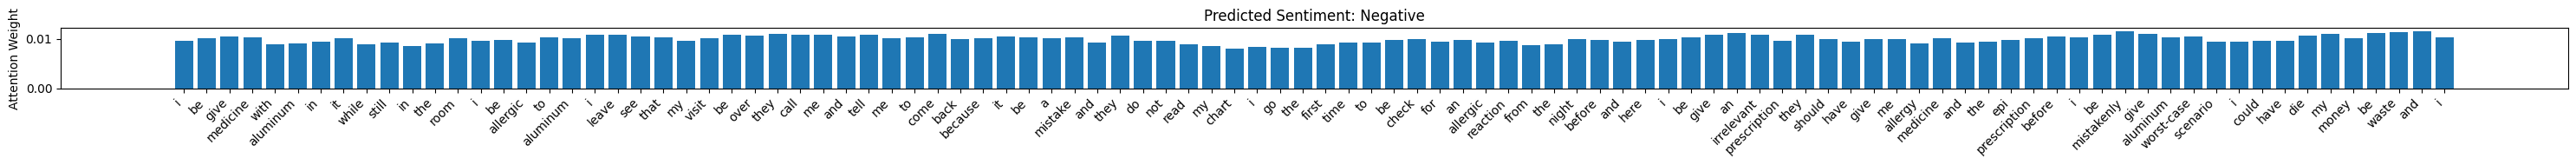

In [47]:
# Visualize attention for 1 sample review
import matplotlib.pyplot as plt

idx = 0
input_text = X_test[idx]
seq = tokenizer.texts_to_sequences([input_text])
padded = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

pred, attn = attention_model.predict(padded)
attn = attn[0].squeeze()
words = input_text.split()

words = words[:len(attn)] 
plt.figure(figsize=(30, 2))
plt.title(f"Predicted Sentiment: {'Positive' if pred[0][0] > 0.5 else 'Negative'}")
plt.bar(range(len(words)), attn[:len(words)])
plt.xticks(range(len(words)), words, rotation=45, ha='right')
plt.ylabel("Attention Weight")
plt.tight_layout()
plt.show()


**TEST ON UNSEEN DATA**

In [48]:
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

7644/7644 ━━━━━━━━━━━━━━━━━━━━ 98s 13ms/step - accuracy: 0.9582 - loss: 0.1187
Test Accuracy: 0.9587
Test Loss: 0.1172


**EVALUATION ON TEST SET**

7644/7644 ━━━━━━━━━━━━━━━━━━━━ 113s 15ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     98187
           1       0.97      0.96      0.97    146411

    accuracy                           0.96    244598
   macro avg       0.96      0.96      0.96    244598
weighted avg       0.96      0.96      0.96    244598



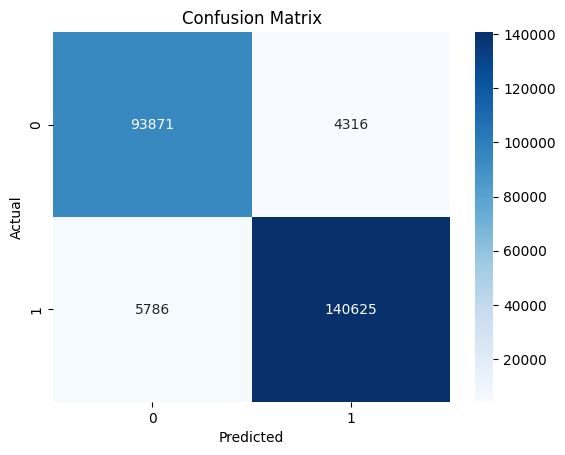

In [49]:
#prediction
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype("int32")

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**ROC AUC SCORE**

ROC AUC Score: 0.9927


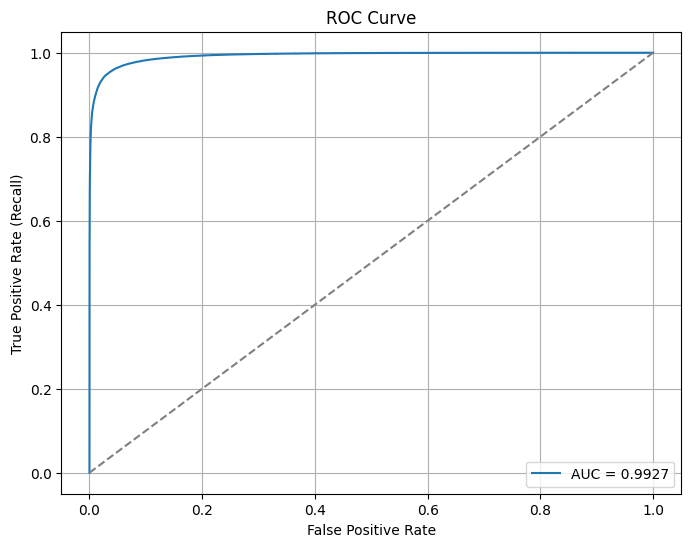

In [53]:
#compute ROC AUC score
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

#plot the ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

#calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

#plotting
plt.figure(figsize = (8,6))
plt.plot(fpr,tpr,label = f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1],linestyle ='--', color = 'gray') #random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.grid(True)
plt.show()

**LOG LOSS**

In [54]:
#compute log loss
from sklearn.metrics import log_loss
log_loss = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {log_loss:.4f}")

Log Loss: 0.1172


**SAVE THE MODEL**

In [55]:

#to interpret
model.save("model_bilstm2_trainable_attention_interpret.h5")
model.save("model_bilstm2_trainable_attention_interpret.keras")

In [ ]:
#to train (first one trained)
model.save("model_bilstm2_trainable_attention.h5")
model.save("model_bilstm2_trainable_attention.keras")

**SAVE TOKENIZER**

In [38]:
import pickle

# Save tokenizer object
with open("bilstm_gloveattention_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

**VISUALIZING ATTENTION WEIGHTS**